In [ ]:
import pandas as pd
import json

with open('data_full.json') as json_file: 
    data_dict = json.load(json_file) 

print(data_dict.keys())

dict_keys(['oos_val', 'val', 'train', 'oos_test', 'test', 'oos_train'])


In [ ]:


train_data = data_dict['train']
val_data = data_dict['val']
test_data = data_dict['test']

oos_train = data_dict['oos_train']
oos_val = data_dict['oos_val']
oos_test = data_dict['oos_test']


train_df = pd.DataFrame(train_data, columns =['query', 'intent'])
val_df = pd.DataFrame(val_data, columns =['query', 'intent'])
test_df = pd.DataFrame(test_data, columns =['query', 'intent'])

#print(train_df.head())
# grouping
#train_df.groupby("intent").count().to_excel('ds_grouped.xlsx',sheet_name="Sheet1")

169
Number of types: 169
Most common type: [('fact', 52), ('tell', 43), ('fun', 39), ('trivia', 36), ('interesting', 21), ('something', 18), ('know', 15), ('facts', 13), ('give', 12), ("'s", 11)]


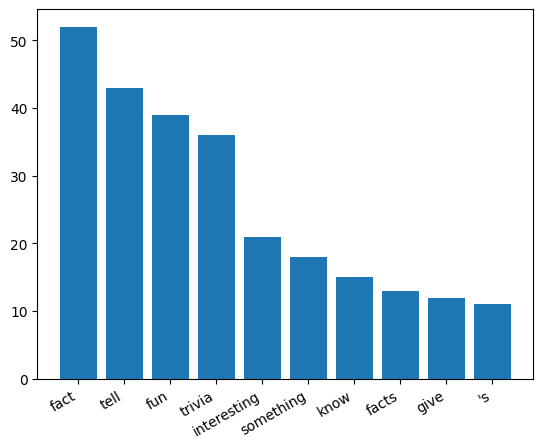

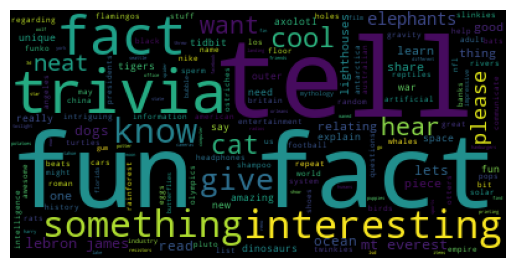

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from nltk import word_tokenize
from nltk.corpus import stopwords

# concatenating validation and train set
frames = [train_df,val_df]
train_val_df = pd.concat(frames)

intent_class=["fun_fact","replacement_card_duration","time","maybe","car_rental"]

fun_fact = train_val_df[train_val_df['intent']==intent_class[0]]
fun_fact_list = fun_fact['query'].tolist()


vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(fun_fact_list).toarray()



tokens_list = []
wordcloud = WordCloud().generate(" ".join(fun_fact_list))
tokens = word_tokenize(" ".join(fun_fact_list))
tokens_list=[w for w in tokens if w not in list(stopwords.words('english'))]
c = Counter(tokens_list)
most_common = c.most_common(10)

print("Number of types:",len(set(tokens_list)))
print("Most common type:",most_common)

feats = [feat[0] for feat in most_common]
counts = [count[1] for count in most_common]

plt.bar(feats,counts)
plt.xticks(rotation=30, ha='right')


plt.figure()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()



In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from operator import itemgetter

def plot_top_n(corpus, sent_idx, vectorizer, n):
    X = vectorizer.fit_transform(corpus).toarray()
    feat_val = list(zip(vectorizer.get_feature_names_out(), X[sent_idx]))
    feat_val.sort(key=itemgetter(1), reverse=True)

    feat_val_top_n = feat_val[:n-1]
    feat_val_sep = list(zip(*feat_val_top_n))

    plt.bar(feat_val_sep[0],feat_val_sep[1])
    plt.xticks(rotation=30, ha='right')
    plt.show()

intents = train_val_df.groupby('intent')['query'].apply(lambda x: " ".join(x))
# print(intents)
# intents2 = train_val_df.groupby('intent')['query'].apply(list)
# print(intents2)

keys = list(intents.keys())
values = list(intents.values)

intent = "calculator"
idx = keys.index(intent)
n = 10
print(f"For the intent class '{intent}' the top {n} unigrams have the following counts and TF-IDF scores:")
plot_top_n(values, idx, CountVectorizer(ngram_range=(1,1)), n)
plot_top_n(values, idx, TfidfVectorizer(ngram_range=(1,1)), n)


intents = train_val_df.groupby('intent')['query'].apply(lambda x: "ssss " + " ssss ".join(x) + " ssss")
keys = list(intents.keys())
values = list(intents.values)

n_gram = 2
n = 10
print(f"For the intent class '{intent}' the top {n} {n_gram}-grams have the following counts and TF-IDF scores:")
plot_top_n(values, idx, CountVectorizer(ngram_range=(n_gram,n_gram)), n)
plot_top_n(values, idx, TfidfVectorizer(ngram_range=(n_gram,n_gram)), n)
